In [1]:
# Importing all the required libraries.
import pandas as pd
import numpy as np


In [2]:
#import nltk
#nltk.download('stopwords')

In [3]:
#import nltk
#nltk.download('punkt')

In [4]:
# Importing the VAERS report dataset.
df1 = pd.read_csv("..//Datasets//2021VAERSData.csv", encoding='latin1')

# Removing columns with 90% NaN values.
df1.drop(["RPT_DATE", "V_FUNDBY", "CAGE_MO", "BIRTH_DEFECT", "RECVDATE", "TODAYS_DATE", "SPLTTYPE", "SYMPTOM_TEXT"], axis=1, inplace=True)

# Mean imputation on numerical columns.
df1['AGE_YRS'].fillna(round(df1['AGE_YRS'].mean()), inplace = True)
df1['CAGE_YR'].fillna(round(df1['CAGE_YR'].mean()), inplace = True)
df1['HOSPDAYS'] = df1.apply(
    lambda row: 0 if pd.isna(row['HOSPITAL']) else row['HOSPDAYS'],
    axis = 1
)

df1['HOSPDAYS'].fillna(round(df1['HOSPDAYS'].mean()), inplace = True)
df1['NUMDAYS'].fillna(round(df1['NUMDAYS'].mean()), inplace = True)

# Filling categorical columns with mode.
df1.fillna(df1.mode().iloc[0], inplace = True)
df1

,VAERS_ID,STATE,AGE_YRS,CAGE_YR,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,LAB_DATA,V_ADMINBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,FORM_VERS,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,TX,33.0,33.0,F,Y,02/01/2021,Y,Y,Y,...,None,PVT,None,None,None,Flu,2,Y,Y,Pcn and bee venom
1,916601,CA,73.0,73.0,F,Y,02/01/2021,Y,Y,Y,...,None,SEN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Flu,2,Y,Y,"""Dairy"""
2,916602,WA,23.0,23.0,F,Y,02/01/2021,Y,Y,Y,...,None,SEN,None,None,None,Flu,2,Y,Y,Shellfish
3,916603,WA,58.0,58.0,F,Y,02/01/2021,Y,Y,Y,...,none,WRK,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",2,Y,Y,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47.0,47.0,F,Y,02/01/2021,Y,Y,Y,...,None,PUB,Na,Na,None,Flu,2,Y,Y,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27950,1092595,TX,70.0,70.0,F,Y,02/01/2021,Y,Y,Y,...,None,PVT,None,None,None,Flu,2,Y,Y,NKA
27951,1092651,CA,77.0,77.0,M,Y,02/27/2021,Y,Y,Y,...,None,PHM,"HTN, DM, Cholesterol and blood thinners",+Covid in January 2021,Cardiac,Flu,2,Y,Y,None
27952,1092653,CA,88.0,88.0,F,Y,03/10/2021,Y,Y,Y,...,Patient expired.,SEN,"Vitamin B12,C,D3. Eyedrops, probiotics","Bladder cancer, Malignant melanoma, both in re...","Interstitial cystitis, mitral valve prolapse, ...",Flu,2,Y,Y,robitussin
27953,1092737,ME,69.0,69.0,M,Y,03/11/2021,Y,Y,Y,...,Ambulance personnel pronounced dead at scene,PHM,Levothyroxine Insulin Diabetes meds,None,"Diabetes, coronary artery disease, hypothyroidism",Flu,2,Y,Y,None known


In [5]:
# Importing the VAERS sympotoms and vaccine datasets.
df2 = pd.read_csv("..//Datasets//2021VAERSSYMPTOMS.csv", encoding='latin1')
df3 = pd.read_csv("..//Datasets//2021VAERSVAX.csv", encoding='latin1')

# Pre-processing both the datasets.
df2 = df2.dropna(axis = 0)
df2.drop(["SYMPTOMVERSION1", "SYMPTOMVERSION2", "SYMPTOMVERSION3", "SYMPTOMVERSION4", "SYMPTOMVERSION5"], axis=1, 
         inplace=True)

df3.drop(["VAX_LOT", "VAX_SITE"], axis=1, inplace=True)
df3.fillna(df3.mode().iloc[0], inplace = True)

In [6]:
df2

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
10,916611,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite
11,916611,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache
12,916611,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain
13,916611,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia
17,916615,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy
...,...,...,...,...,...,...
39527,1091269,COVID-19,COVID-19 pneumonia,Cerebrovascular accident,Death,Mechanical ventilation
39531,1091439,Cerebral haemorrhage,Computerised tomogram abnormal,Death,Dementia,Fall
39534,1091560,Balance disorder,Blood test,Craniotomy,Fall,Haemoglobin decreased
39548,1092483,Death,Dyspnoea,Fatigue,Headache,Respiration abnormal


In [7]:
df3

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,916600,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,UNK,IM,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...
28337,1092595,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
28338,1092651,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
28339,1092653,COVID19,MODERNA,2,SYR,COVID19 (COVID19 (MODERNA))
28340,1092737,COVID19,MODERNA,1,UN,COVID19 (COVID19 (MODERNA))


In [8]:
# Making the final patient dataset.
# Would be used to predict the medical needs of a particular patient.
df4 = pd.concat([df1, df2, df3], axis=1, join="inner")

# Some pre-processing.
#df4.drop(df4.columns[28], axis=1, inplace=True)
df4.reset_index(inplace = True)
#df4['SYMPTOM_TEXT'] = df4['SYMPTOM_TEXT'].str.replace("[^a-zA-Z#]"," ")

In [9]:
'''# Removing stop words and tokenizing the text for SYMPTOM_TEXT column.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df4['SYMPTOM_TEXT'] = df4['SYMPTOM_TEXT'].astype(str)
s = df4['SYMPTOM_TEXT']
stop_words = stopwords.words('english')
filtered_reviews = []

for text in s:
    word_tokens = word_tokenize(text)
    word_tokens
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_reviews.append(filtered_sentence)
    
filtered_reviews'''

"# Removing stop words and tokenizing the text for SYMPTOM_TEXT column.\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\n\ndf4['SYMPTOM_TEXT'] = df4['SYMPTOM_TEXT'].astype(str)\ns = df4['SYMPTOM_TEXT']\nstop_words = stopwords.words('english')\nfiltered_reviews = []\n\nfor text in s:\n    word_tokens = word_tokenize(text)\n    word_tokens\n    filtered_sentence = [w for w in word_tokens if not w in stop_words]\n    filtered_reviews.append(filtered_sentence)\n    \nfiltered_reviews"

In [10]:
'''# Finding the stems of the SYMPTOM_TEXT column.
from nltk import PorterStemmer

ps=PorterStemmer()
stemmed_reviews=[]

for text in filtered_reviews:
    L=[]
    for w in text:
        L.append(ps.stem(w))
    stemmed_reviews.append(L)
    
stemmed_reviews'''

'# Finding the stems of the SYMPTOM_TEXT column.\nfrom nltk import PorterStemmer\n\nps=PorterStemmer()\nstemmed_reviews=[]\n\nfor text in filtered_reviews:\n    L=[]\n    for w in text:\n        L.append(ps.stem(w))\n    stemmed_reviews.append(L)\n    \nstemmed_reviews'

In [11]:
'''# Creating a column of cleaned reviews and reappending it to the dataframe.
clean=[]
for text in stemmed_reviews:
    st=""
    for w in text:
        st=st+w+" "
    clean.append(st)

df4['SYMPTOM_TEXT'] = [rev for rev in clean]'''

'# Creating a column of cleaned reviews and reappending it to the dataframe.\nclean=[]\nfor text in stemmed_reviews:\n    st=""\n    for w in text:\n        st=st+w+" "\n    clean.append(st)\n\ndf4[\'SYMPTOM_TEXT\'] = [rev for rev in clean]'

In [12]:
df4

,index,VAERS_ID,STATE,AGE_YRS,CAGE_YR,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,...,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,10,916611,NC,33.0,33.0,F,Y,02/01/2021,Y,Y,...,Chest pain,Chills,Confusional state,Decreased appetite,916611,COVID19,MODERNA,1,SYR,COVID19 (COVID19 (MODERNA))
1,11,916613,CA,40.0,40.0,F,Y,02/01/2021,Y,Y,...,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,COVID19,MODERNA,1,SYR,COVID19 (COVID19 (MODERNA))
2,12,916614,NY,29.0,29.0,F,Y,02/01/2021,Y,Y,...,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
3,13,916615,NY,38.0,38.0,F,Y,02/01/2021,Y,Y,...,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
4,17,916620,NJ,65.0,65.0,M,Y,02/01/2021,Y,Y,...,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,66.0,M,Y,03/05/2021,Y,Y,...,Hypotension,Malaise,Nausea,Pain in extremity,1080851,COVID19,MODERNA,2,IM,COVID19 (COVID19 (MODERNA))
10773,27948,1092483,IA,67.0,67.0,F,Y,03/11/2021,Y,Y,...,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,COVID19,PFIZER\BIONTECH,2,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
10774,27950,1092595,TX,70.0,70.0,F,Y,02/01/2021,Y,Y,...,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
10775,27952,1092653,CA,88.0,88.0,F,Y,03/10/2021,Y,Y,...,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,COVID19,MODERNA,2,IM,COVID19 (COVID19 (MODERNA))


In [13]:
df4.drop(["DIED","VAX_TYPE","VAX_NAME","VAX_ROUTE","CAGE_YR"], axis=1, inplace=True)

In [14]:
df4

,index,VAERS_ID,STATE,AGE_YRS,SEX,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,ALLERGIES,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_MANU,VAX_DOSE_SERIES
0,10,916611,NC,33.0,F,02/01/2021,Y,Y,Y,0.0,...,Dust mites Zoloft Wellbutrin Buspar,916611,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,916611,MODERNA,1
1,11,916613,CA,40.0,F,02/01/2021,Y,Y,Y,0.0,...,None,916611,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,MODERNA,1
2,12,916614,NY,29.0,F,02/01/2021,Y,Y,Y,0.0,...,None,916611,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,MODERNA,1
3,13,916615,NY,38.0,F,02/01/2021,Y,Y,Y,0.0,...,"Sulfa, steri strips, adhesive bandages",916611,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,MODERNA,1
4,17,916620,NJ,65.0,M,02/01/2021,Y,Y,Y,0.0,...,None,916615,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,MODERNA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,M,03/05/2021,Y,Y,Y,0.0,...,Losartan Simvastatin Amlodipine,1037873,Hyperhidrosis,Hypotension,Malaise,Nausea,Pain in extremity,1080851,MODERNA,2
10773,27948,1092483,IA,67.0,F,03/11/2021,Y,Y,Y,0.0,...,"Combivent, gabapentin, tramadol.",1037874,Cardiac flutter,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,PFIZER\BIONTECH,2
10774,27950,1092595,TX,70.0,F,02/01/2021,Y,Y,Y,0.0,...,NKA,1037875,Balance disorder,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,MODERNA,1
10775,27952,1092653,CA,88.0,F,03/10/2021,Y,Y,Y,0.0,...,robitussin,1037877,COVID-19,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,MODERNA,2


In [15]:
df4.columns

Index(['index', 'VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'FORM_VERS',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAERS_ID', 'SYMPTOM1',
       'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAERS_ID', 'VAX_MANU',
       'VAX_DOSE_SERIES'],
      dtype='object')

In [16]:
#df4['VAX_TYPE']

In [17]:
# Importing the supply chain dataset.
df5 = pd.read_csv("..//Datasets//SCMS_Delivery_History_Dataset.csv")

In [18]:
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [19]:
#X = df4[['SEX', 'SYMPTOM_TEXT', 'CUR_ILL', 'PRIOR_VAX', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'VAX_TYPE', 'VAX_NAME']].copy()
X = df4[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].copy()
#X = df4[['SEX']].copy()
Y = df4[['OTHER_MEDS']].copy()

In [20]:
X['Mixed'] = X[X.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X['Mixed'])
'''from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X['Mixed'])
#y = df[['Tagged']'''
X

<10777x1905 sparse matrix of type '<class 'numpy.float64'>'
	with 88496 stored elements in Compressed Sparse Row format>

In [21]:
import scipy.sparse
X=pd.DataFrame.sparse.from_spmatrix(X)

In [22]:
X

,0,1,2,3,4,5,6,7,8,9,...,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.356371,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10773,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10774,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10775,0.291465,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
'''from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 80% training and 20% test.'''

'from sklearn.model_selection import train_test_split\n\n# Split dataset into training set and test set\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=109) # 80% training and 20% test.'

In [24]:
# Using the elbow method to get the optimum number of clusters.

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<Figure size 640x480 with 1 Axes>

In [25]:
# Perform K-Means Clustering of the data & predict the clusters.

kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
#temp = set(y_kmeans.tolist())
#temp

temp = dict()

for i in y_kmeans.tolist():
    temp[i] = 0
    
for i in y_kmeans.tolist():
    temp[i] += 1
    
print(temp)

{0: 6706, 2: 2474, 1: 1597}


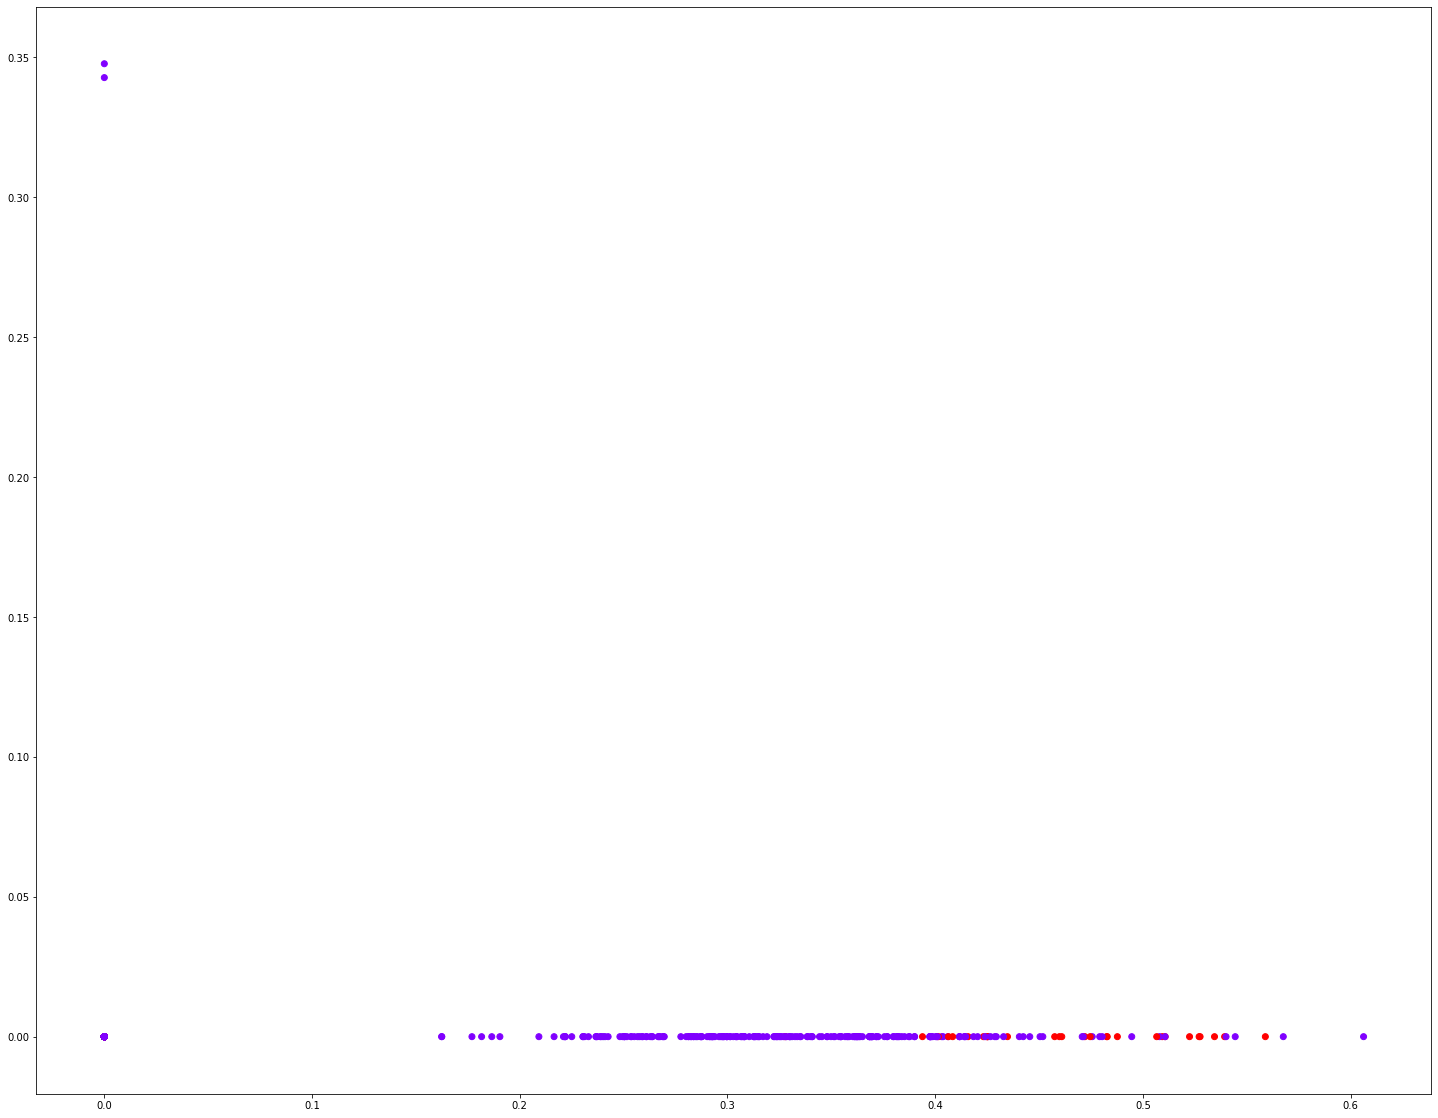

In [27]:
plt.figure(figsize=(25, 20))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.show()

In [28]:
df4['Cluster'] = y_kmeans.tolist()

df4

,index,VAERS_ID,STATE,AGE_YRS,SEX,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_MANU,VAX_DOSE_SERIES,Cluster
0,10,916611,NC,33.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,916611,MODERNA,1,0
1,11,916613,CA,40.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,MODERNA,1,0
2,12,916614,NY,29.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,MODERNA,1,0
3,13,916615,NY,38.0,F,02/01/2021,Y,Y,Y,0.0,...,916611,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,MODERNA,1,2
4,17,916620,NJ,65.0,M,02/01/2021,Y,Y,Y,0.0,...,916615,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,MODERNA,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,M,03/05/2021,Y,Y,Y,0.0,...,1037873,Hyperhidrosis,Hypotension,Malaise,Nausea,Pain in extremity,1080851,MODERNA,2,2
10773,27948,1092483,IA,67.0,F,03/11/2021,Y,Y,Y,0.0,...,1037874,Cardiac flutter,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,PFIZER\BIONTECH,2,0
10774,27950,1092595,TX,70.0,F,02/01/2021,Y,Y,Y,0.0,...,1037875,Balance disorder,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,MODERNA,1,0
10775,27952,1092653,CA,88.0,F,03/10/2021,Y,Y,Y,0.0,...,1037877,COVID-19,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,MODERNA,2,0


In [29]:
l=[]

for i in df4['OTHER_MEDS']:
    if(',' in i):
        temp=i.split(',')
        
        for j in range(len(temp)):
            temp[j]=temp[j].strip()
        
        l.extend(temp)
    elif(' ' not in i):
        l.append(i.strip())
        
l=list(set(l))

import random
meds=[random.choice(l) for i in range(len(df4))]
df4['meds']=meds
df4

,index,VAERS_ID,STATE,AGE_YRS,SEX,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAERS_ID,VAX_MANU,VAX_DOSE_SERIES,Cluster,meds
0,10,916611,NC,33.0,F,02/01/2021,Y,Y,Y,0.0,...,Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,916611,MODERNA,1,0,Metronidazole
1,11,916613,CA,40.0,F,02/01/2021,Y,Y,Y,0.0,...,Dyspnoea,Fatigue,Feeling abnormal,Head discomfort,Headache,916613,MODERNA,1,0,calcium w vitamin D
2,12,916614,NY,29.0,F,02/01/2021,Y,Y,Y,0.0,...,Heart rate decreased,Heart rate increased,Hypertension,Injection site pain,Musculoskeletal chest pain,916614,MODERNA,1,0,fishpond
3,13,916615,NY,38.0,F,02/01/2021,Y,Y,Y,0.0,...,Nausea,Pain,Pain in extremity,Paraesthesia oral,Pyrexia,916615,MODERNA,1,2,lactulose
4,17,916620,NJ,65.0,M,02/01/2021,Y,Y,Y,0.0,...,Injection site erythema,Injection site pruritus,Injection site swelling,Lymph node pain,Lymphadenopathy,916620,MODERNA,1,1,hydroxychloroquine 200mg po daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,27946,1092214,ME,66.0,M,03/05/2021,Y,Y,Y,0.0,...,Hyperhidrosis,Hypotension,Malaise,Nausea,Pain in extremity,1080851,MODERNA,2,2,bacillus coagulans
10773,27948,1092483,IA,67.0,F,03/11/2021,Y,Y,Y,0.0,...,Cardiac flutter,Chest pain,Dizziness,Dyspnoea,Feeling hot,1080983,PFIZER\BIONTECH,2,0,Propranolol 120 mg
10774,27950,1092595,TX,70.0,F,02/01/2021,Y,Y,Y,0.0,...,Balance disorder,Dizziness,Fall,Hypoaesthesia,Muscular weakness,1081009,MODERNA,1,0,Liothyronine Vitamin c
10775,27952,1092653,CA,88.0,F,03/10/2021,Y,Y,Y,0.0,...,COVID-19,Echocardiogram,Fall,Hip fracture,SARS-CoV-2 test,1081033,MODERNA,2,0,Diltazem CD


In [30]:
# Taking user medicine input.
inp = X.iloc[0, :]



In [31]:
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm

k = 3

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X, y_kmeans.tolist())

#print(neigh.predict([inp]))

distances, indices = neigh.kneighbors([inp])

#print(distances)
print(indices)

[[   0 7875 7642]]


In [32]:
type(indices)

numpy.ndarray

In [33]:
predicted_meds = []

for i in indices.ravel():
    predicted_meds.append(df4['meds'][i])
    #print(df4['meds'][i], '\n')
    #print(df4.iloc[i, :], '\n\n')

In [34]:
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [35]:
import random

meds = [random.choice(l) for i in range(len(df5))]
df5['Item Description'] = meds

'''a = set(df4['meds'])
b = set(df5['Item Description'])

print(a.intersection(b))'''

"a = set(df4['meds'])\nb = set(df5['Item Description'])\n\nprint(a.intersection(b))"

In [36]:
x = df5['Weight (Kilograms)']

print(x[10319].isnumeric())

False


In [37]:
total = 0
count = 0
for i in x:
    if i.isnumeric():
        total += float(i)
        count += 1
average = total/count

for i in range(len(x)):
    if not x[i].isnumeric():
        x[i] = average
        
print(x)

D:\Anaconda_Navigator\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0             13
1            358
2            171
3           1855
4           7590
          ...   
10319    3424.44
10320    3424.44
10321    3424.44
10322       1392
10323    3424.44
Name: Weight (Kilograms), Length: 10324, dtype: object


In [38]:
df5['Weight (Kilograms)'] = x

In [39]:
df5['Weight (Kilograms)']

0             13
1            358
2            171
3           1855
4           7590
          ...   
10319    3424.44
10320    3424.44
10321    3424.44
10322       1392
10323    3424.44
Name: Weight (Kilograms), Length: 10324, dtype: object

In [40]:
a = open('..//medications//test.txt', 'w')
a.write('theunixdisaster\t 05')
a.close()

In [41]:
x2 = set(df4['meds'])
x2

{'',
 'mirilax',
 'Pamelor',
 'Citalopram 20mg. Temazepan 15m',
 'Goli apple cider vinegar gummy supplement',
 'Orilissa',
 '1 aspirin a day 81 mg',
 'Ondansetron 4 MG BID',
 'PRENATAL VITAMINS (NOT PREGNANT OR SEEKING PREGNANCY)',
 'sodium chloride',
 'lisinopril 10 MG tablet',
 '.',
 'Spiriva Respimat Aerosol Solution 1.25 MCG/ACT (Tiotropium Bromide Monohydrate)',
 'Vita C',
 'Melatonin Restoril Benadryl Vitamin D3 10',
 'NUVARING',
 'Adderall 20 mg - 2 tabs bid',
 'coenzyme Q 10',
 'metolazone',
 'Bisoprolol/HCTZ',
 'severe dizziness',
 'Lovostatin 40 mg',
 'Lexapro 20 mg daily',
 'once a day',
 'OTC)  Magnesium gluconate  supplement OTC  MV',
 'Botox',
 'eliquis 2.5mg tab',
 'Calcium tablet and Omeprazole 40mg',
 'isosorbide',
 'fluoxetine 40mg PO QD',
 'hypoxia',
 'Power Zinc chewable',
 'Cortisone shot to the shoulder',
 'loratadine 10 mg',
 'unkown',
 'metoprolol succinate 25 mg',
 'Lo loestrin',
 'Lispro in',
 'Diphenhydramine HCl',
 'Kratom 1 tsp 3 x a day',
 'nightly as need

In [42]:
a = open('..//medications//test.txt', 'w')
a.write('')



a.close()

In [43]:
a = open('..//medications//test.txt', 'a')

for i in x2:
    a.write(str(i+'$' + str(random.randint(1, 1000)) + '\n'))



a.close()

In [44]:
l = dict()

a = open('..//medications//test.txt', 'r')

Lines = a.readlines()
 
# Strips the newline character
for line in range(len(Lines)-1):
    temp = Lines[line].split('$')
    #print(temp)
    l[temp[0]] = int(temp[1].replace('\n','').strip())
    #print(temp[1].replace('\n','').strip())
a.close()
print(l)
#for i in df5['Item Description']:
    

{'': 262, 'mirilax': 795, 'Pamelor': 130, 'Citalopram 20mg. Temazepan 15m': 329, 'Goli apple cider vinegar gummy supplement': 605, 'Orilissa': 684, '1 aspirin a day 81 mg': 368, 'Ondansetron 4 MG BID': 820, 'PRENATAL VITAMINS (NOT PREGNANT OR SEEKING PREGNANCY)': 220, 'sodium chloride': 947, 'lisinopril 10 MG tablet': 721, '.': 345, 'Spiriva Respimat Aerosol Solution 1.25 MCG/ACT (Tiotropium Bromide Monohydrate)': 272, 'Vita C': 625, 'Melatonin Restoril Benadryl Vitamin D3 10': 268, 'NUVARING': 365, 'Adderall 20 mg - 2 tabs bid': 709, 'coenzyme Q 10': 261, 'metolazone': 852, 'Bisoprolol/HCTZ': 940, 'severe dizziness': 71, 'Lovostatin 40 mg': 233, 'Lexapro 20 mg daily': 775, 'once a day': 733, 'OTC)  Magnesium gluconate  supplement OTC  MV': 304, 'Botox': 477, 'eliquis 2.5mg tab': 723, 'Calcium tablet and Omeprazole 40mg': 161, 'isosorbide': 891, 'fluoxetine 40mg PO QD': 188, 'hypoxia': 228, 'Power Zinc chewable': 96, 'Cortisone shot to the shoulder': 634, 'loratadine 10 mg': 618, 'unko

In [45]:
x1 = []

for i in df5['Item Description']:
    if i in l.keys():
        x1.append(l[i])
    else:
        x1.append(np.nan)

df5['Suggest count'] = x1
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Suggest count
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,68.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN,371.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN,458.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN,611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,3424.44,See DN-4307 (ID#:83920),705.79,NaN
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,3424.44,See DN-4313 (ID#:83921),161.71,NaN
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,3424.44,Freight Included in Commodity Cost,5284.04,277.0
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03,NaN


In [46]:
df5['Suggest count'].fillna(df5['Suggest count'].median(), inplace=True)

In [47]:
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Suggest count
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,495.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,68.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN,371.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN,458.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN,611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,3424.44,See DN-4307 (ID#:83920),705.79,495.0
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,3424.44,See DN-4313 (ID#:83921),161.71,495.0
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,3424.44,Freight Included in Commodity Cost,5284.04,277.0
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03,495.0


In [48]:
from sklearn import linear_model

X = df5[['Weight (Kilograms)', 'Suggest count']].astype(float)
y = df5['Line Item Quantity']

regr = linear_model.LinearRegression()
regr.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
x_pred = [[float(df5['Weight (Kilograms)'][0]), float(df5['Suggest count'][0])]]
regr.predict(x_pred)

array([14488.88886516])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = regr.predict(X_test)

In [53]:
print(y_pred)

[25360.5292082  18200.43345006 18286.32549197 ... 16373.17461089
 25594.31534207 15847.31197557]


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_test, y_pred)

mean_absolute_error(y_test, y_pred)

20912.343591216402

# Demand Estimation

In [55]:
predicted_meds


['Metronidazole', 'Upcal w/Vitamin D', 'Vitamin K2 + D']

In [56]:
df6=pd.DataFrame(columns=['Scheduled Delivery Date','Line Item Quantity','Line Item Value'])
#df6=pd.DataFrame(columns=list(df4.columns))

l1=[]
l2=[]
l3=[]

for i in range(len(df5['Item Description'])):
    if(df5['Item Description'][i]=='diazepam 2 mg' or df5['Item Description'][i]=='Ortho tri cyclen lo' or df5['Item Description'][i]=='Xarelto 20mg daily'):
        print(df5.iloc[i,:]["Line Item Quantity"])
        l1.append(df5.iloc[i,:]['Scheduled Delivery Date'])
        l2.append(df5.iloc[i,:]['Line Item Quantity'])
        l3.append(df5.iloc[i,:]['Line Item Value'])

df6['Scheduled Delivery Date']=l1
df6['Line Item Quantity']=l2
df6['Line Item Value']=l3        
        #df6.append(df5.loc[i],ignore_index=False)
    #df6.append(pd.DataFrame(df5.iloc[i,:]))
    
    #print(df5['Item Description'][i])
    #print(i)


df6

6
117
10364
63652
8000
1500
1628


,Scheduled Delivery Date,Line Item Quantity,Line Item Value
0,24-Apr-08,6,47.28
1,1-Feb-07,117,9117.81
2,9-Jul-14,10364,922396.00
3,7-Nov-13,63652,203049.88
4,19-Apr-10,8000,41040.00
5,19-Apr-10,1500,11250.00
6,16-Mar-10,1628,3093.20


In [57]:
df6["Scheduled Delivery Date"]= pd.to_datetime(df6["Scheduled Delivery Date"],format='%d-%b-%y')
df6

print(df6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
Scheduled Delivery Date    7 non-null datetime64[ns]
Line Item Quantity         7 non-null int64
Line Item Value            7 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 296.0 bytes
None


In [58]:
df6 = df6.sort_values(by="Scheduled Delivery Date")
df6

,Scheduled Delivery Date,Line Item Quantity,Line Item Value
1,2007-02-01,117,9117.81
0,2008-04-24,6,47.28
6,2010-03-16,1628,3093.20
4,2010-04-19,8000,41040.00
5,2010-04-19,1500,11250.00
3,2013-11-07,63652,203049.88
2,2014-07-09,10364,922396.00


In [59]:
df6.reset_index(inplace=True)
df6

,index,Scheduled Delivery Date,Line Item Quantity,Line Item Value
0,1,2007-02-01,117,9117.81
1,0,2008-04-24,6,47.28
2,6,2010-03-16,1628,3093.20
3,4,2010-04-19,8000,41040.00
4,5,2010-04-19,1500,11250.00
5,3,2013-11-07,63652,203049.88
6,2,2014-07-09,10364,922396.00


In [60]:
df6.drop(['index'],axis=1,inplace=True)
df6

,Scheduled Delivery Date,Line Item Quantity,Line Item Value
0,2007-02-01,117,9117.81
1,2008-04-24,6,47.28
2,2010-03-16,1628,3093.20
3,2010-04-19,8000,41040.00
4,2010-04-19,1500,11250.00
5,2013-11-07,63652,203049.88
6,2014-07-09,10364,922396.00


D:\Anaconda_Navigator\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


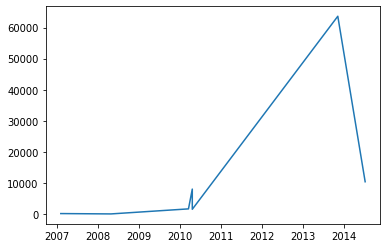

In [61]:
import matplotlib.pyplot as plt
plt.plot(df6['Scheduled Delivery Date'],df6['Line Item Quantity'])

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

#decomposition = seasonal_decompose(df6) 
casemodel = ARIMA(df6['Line Item Quantity'], order=(1, 0, 0))
casemodel_fit = casemodel.fit(disp=0)
'''df_log = np.log(df6.iloc[:,1:3])
df_log['Time']=df6['Scheduled Delivery Date']
#decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)'''
'''data = pd.Series(df6['Line Item Quantity'],index=df6['Scheduled Delivery Date'])
model = ARIMA(data, order=(2,1,2))
results = model.fit(disp=0)'''
'''plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')'''

"plt.plot(df_log_shift)\nplt.plot(results.fittedvalues, color='red')"

In [63]:
casemodel_fit

In [64]:
#forecasting using ARIMA
Y_forecast_arima = casemodel_fit.forecast(steps = 7)[0]

In [65]:
Y_forecast_arima

array([12491.84945095, 12320.51370082, 12334.30976109, 12333.19889381,
       12333.28834152, 12333.28113914, 12333.28171908])

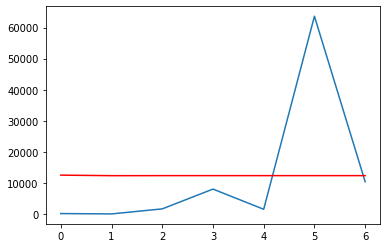

In [66]:
plt.plot(df6.index,df6['Line Item Quantity'])
plt.plot(df6.index,list(Y_forecast_arima),color='red')
plt.show()

In [67]:
casemodel = ARIMA(df6['Line Item Value'], order=(1, 0, 0))
casemodel_fit = casemodel.fit(disp=0)
Y_forecast_arima = casemodel_fit.forecast(steps = 7)[0]
Y_forecast_arima

array([573361.38261122, 386242.86982605, 285928.06985327, 232149.00254563,
       203317.88210015, 187861.43133303, 179575.1813842 ])

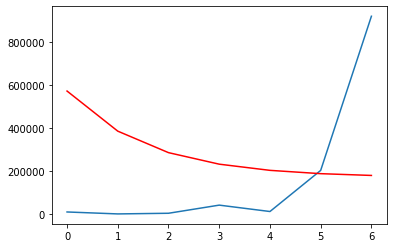

In [68]:
plt.plot(df6.index,df6['Line Item Value'])
plt.plot(df6.index,list(Y_forecast_arima),color='red')
plt.show()

# Production

In [69]:
df5

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Suggest count
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,495.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,68.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN,371.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN,458.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN,611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,3424.44,See DN-4307 (ID#:83920),705.79,495.0
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,3424.44,See DN-4313 (ID#:83921),161.71,495.0
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,3424.44,Freight Included in Commodity Cost,5284.04,277.0
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03,495.0


In [70]:
#df5=df5_copy

In [71]:
df5["Scheduled Delivery Date"]= pd.to_datetime(df5["Scheduled Delivery Date"],format='%d-%b-%y')
d_min=min(df5['Scheduled Delivery Date'].tolist())
X=str(d_min)

In [72]:
set(df5['PO Sent to Vendor Date'])

{'1/10/07',
 '1/11/10',
 '1/11/13',
 '1/12/10',
 '1/12/11',
 '1/12/12',
 '1/13/09',
 '1/13/10',
 '1/13/12',
 '1/14/09',
 '1/14/10',
 '1/14/15',
 '1/15/10',
 '1/15/13',
 '1/16/09',
 '1/16/12',
 '1/16/14',
 '1/16/15',
 '1/17/12',
 '1/17/13',
 '1/18/12',
 '1/19/07',
 '1/19/12',
 '1/19/15',
 '1/2/13',
 '1/20/10',
 '1/20/15',
 '1/21/08',
 '1/21/10',
 '1/21/11',
 '1/22/10',
 '1/22/13',
 '1/22/14',
 '1/23/12',
 '1/23/13',
 '1/24/08',
 '1/24/12',
 '1/24/13',
 '1/25/07',
 '1/25/10',
 '1/25/11',
 '1/25/12',
 '1/26/09',
 '1/26/15',
 '1/27/09',
 '1/27/12',
 '1/28/10',
 '1/28/11',
 '1/28/14',
 '1/28/15',
 '1/29/08',
 '1/29/10',
 '1/29/15',
 '1/3/08',
 '1/3/13',
 '1/30/12',
 '1/30/14',
 '1/30/15',
 '1/31/12',
 '1/4/08',
 '1/5/08',
 '1/5/09',
 '1/5/10',
 '1/5/11',
 '1/5/12',
 '1/6/11',
 '1/6/12',
 '1/7/08',
 '1/7/10',
 '1/7/11',
 '1/7/15',
 '1/8/08',
 '1/8/10',
 '1/8/14',
 '1/9/07',
 '1/9/12',
 '10/1/10',
 '10/10/08',
 '10/10/11',
 '10/10/12',
 '10/10/13',
 '10/11/11',
 '10/12/12',
 '10/13/09',
 '10/

In [73]:
df5['PO Sent to Vendor Date'].replace(to_replace=["Date Not Captured", "N/A - From RDC"], value =X[0:10],inplace=True)

In [74]:
'''df5["PO Sent to Vendor Date"]= pd.to_datetime(df5["PO Sent to Vendor Date"])
set(df5['PO Sent to Vendor Date'])'''

'df5["PO Sent to Vendor Date"]= pd.to_datetime(df5["PO Sent to Vendor Date"])\nset(df5[\'PO Sent to Vendor Date\'])'

In [75]:
set(df5['PO Sent to Vendor Date'])

{'1/10/07',
 '1/11/10',
 '1/11/13',
 '1/12/10',
 '1/12/11',
 '1/12/12',
 '1/13/09',
 '1/13/10',
 '1/13/12',
 '1/14/09',
 '1/14/10',
 '1/14/15',
 '1/15/10',
 '1/15/13',
 '1/16/09',
 '1/16/12',
 '1/16/14',
 '1/16/15',
 '1/17/12',
 '1/17/13',
 '1/18/12',
 '1/19/07',
 '1/19/12',
 '1/19/15',
 '1/2/13',
 '1/20/10',
 '1/20/15',
 '1/21/08',
 '1/21/10',
 '1/21/11',
 '1/22/10',
 '1/22/13',
 '1/22/14',
 '1/23/12',
 '1/23/13',
 '1/24/08',
 '1/24/12',
 '1/24/13',
 '1/25/07',
 '1/25/10',
 '1/25/11',
 '1/25/12',
 '1/26/09',
 '1/26/15',
 '1/27/09',
 '1/27/12',
 '1/28/10',
 '1/28/11',
 '1/28/14',
 '1/28/15',
 '1/29/08',
 '1/29/10',
 '1/29/15',
 '1/3/08',
 '1/3/13',
 '1/30/12',
 '1/30/14',
 '1/30/15',
 '1/31/12',
 '1/4/08',
 '1/5/08',
 '1/5/09',
 '1/5/10',
 '1/5/11',
 '1/5/12',
 '1/6/11',
 '1/6/12',
 '1/7/08',
 '1/7/10',
 '1/7/11',
 '1/7/15',
 '1/8/08',
 '1/8/10',
 '1/8/14',
 '1/9/07',
 '1/9/12',
 '10/1/10',
 '10/10/08',
 '10/10/11',
 '10/10/12',
 '10/10/13',
 '10/11/11',
 '10/12/12',
 '10/13/09',
 '10/

In [77]:
#df5["PO Sent to Vendor Date"]= pd.to_datetime(df5["PO Sent to Vendor Date"],format='%d-%b-%y')